![https://raw.githubusercontent.com/inverted-ai/invertedai/master/docs/images/banner-small.png](https://raw.githubusercontent.com/inverted-ai/invertedai/master/docs/images/banner-small.png)

In [2]:
!pip install invertedai
from IPython.display import display, Image, clear_output
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2
import invertedai as iai
import time
clear_output()

# Provide your API key

In [3]:
iai.add_apikey("")

# Setup

Set up the simulation by defining the location, simulation length (1 step = 0.1 second), and some other constants.

In [9]:
#location = "iai:drake_street_and_pacific_blvd"
location = "iai:marine_drive_viewpoint_3"

SIMULATION_LENGTH = 30
RENDERING_FOV = 130
FIGURE_SIZE = 10
AGENT_COUNT = 10
GIF_RATIO = 1.0
GIF_SIZE = 100*FIGURE_SIZE

# Preview the map location

(None, <matplotlib.image.AxesImage at 0x7f2ec84961a0>)

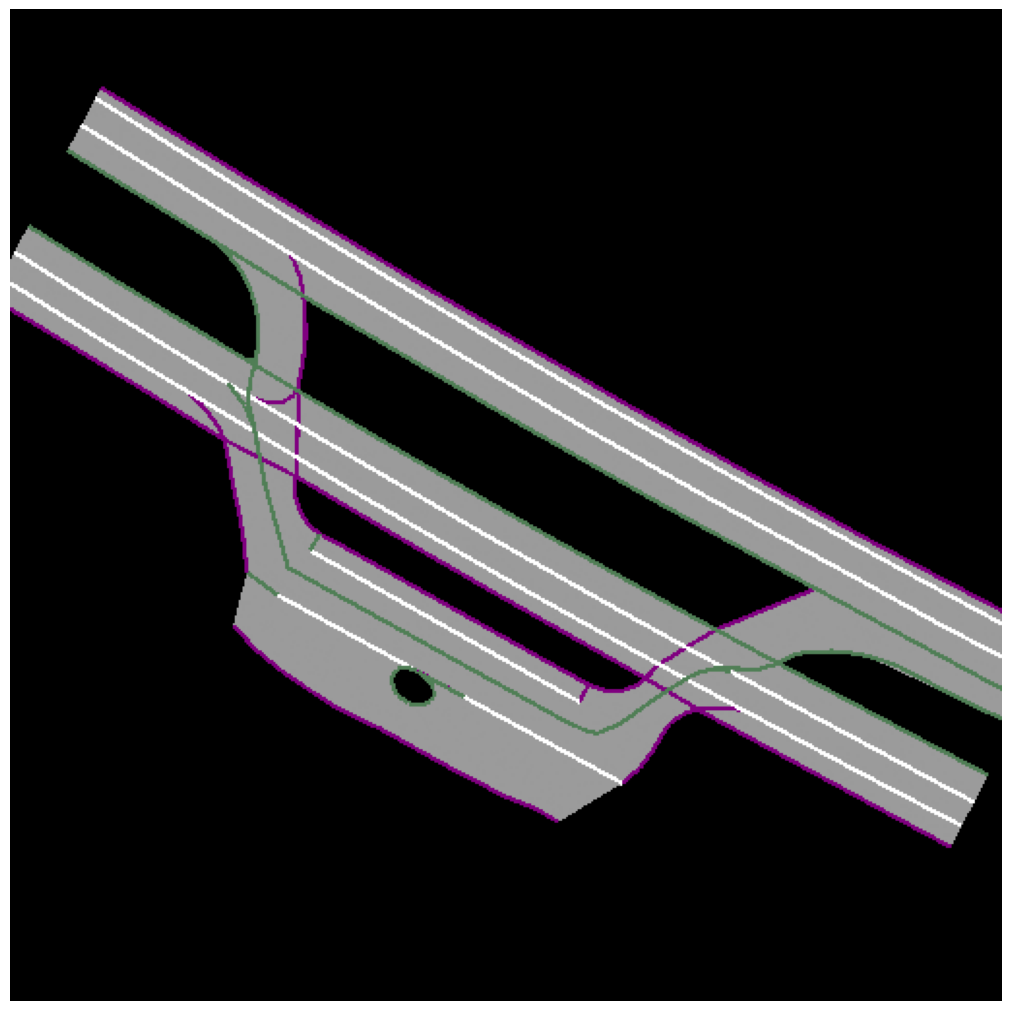

In [5]:
rendered_map = iai.location_info(location=location,rendering_fov=RENDERING_FOV).birdview_image.decode()
fig, ax = plt.subplots(constrained_layout=True, figsize=(FIGURE_SIZE, FIGURE_SIZE))
ax.set_axis_off(), ax.imshow(rendered_map)

# Initialize the simulation

(None, <matplotlib.image.AxesImage at 0x7f2ec8496a10>)

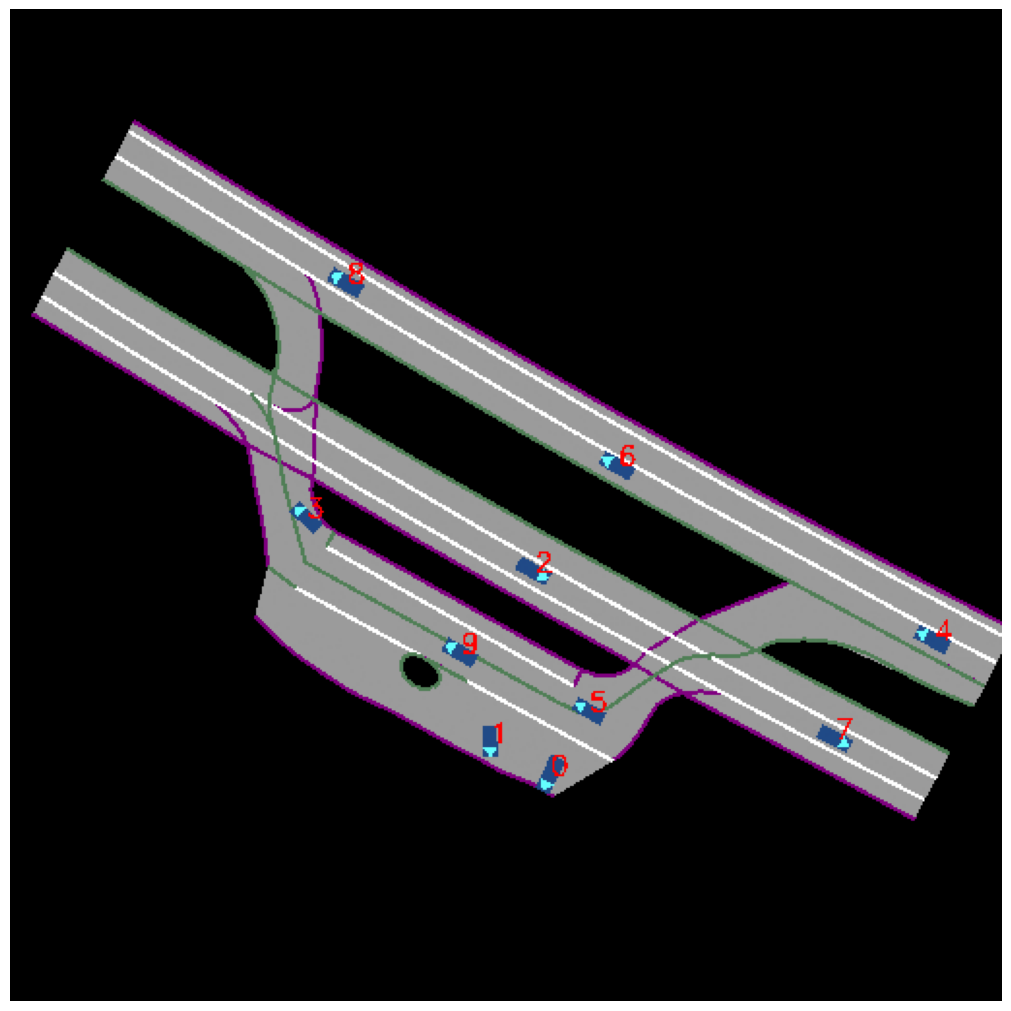

In [6]:
simulation = iai.BasicCosimulation(
    location=location,
    agent_count=AGENT_COUNT,
    get_birdview=True,
)
birdview = simulation.birdview.decode()
fig, ax = plt.subplots(constrained_layout=True, figsize=(FIGURE_SIZE, FIGURE_SIZE))
ax.set_axis_off(), ax.imshow(birdview)

# Start the simulation
\* Returning the birdviews will casue a much longer response time than running without them.

Time to run simulation: 108.56s


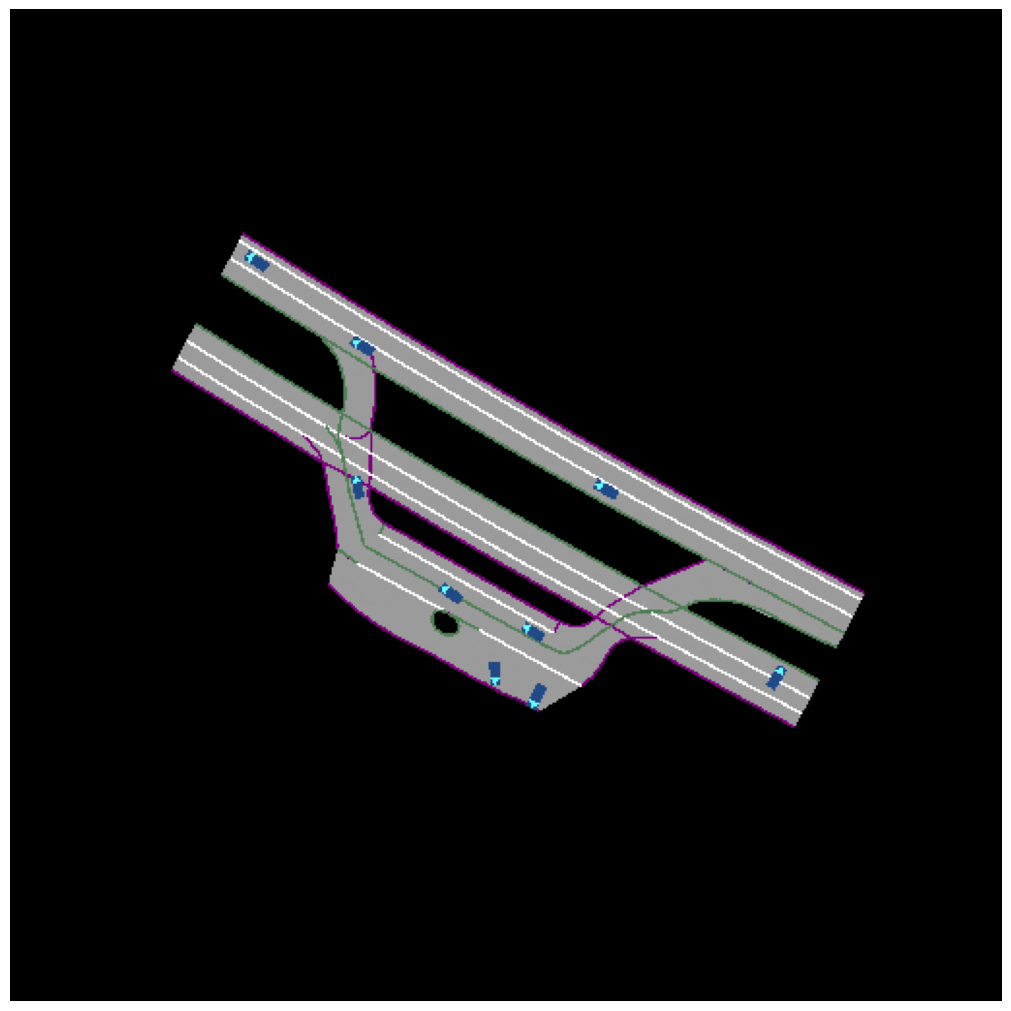

In [7]:
gif_name = 'iai-drive.gif'
fig, ax = plt.subplots(constrained_layout=True, figsize=(FIGURE_SIZE, FIGURE_SIZE))
ax.set_axis_off()
frames = []
is_get_birdview = True
t0 = time.time()
for t in range(SIMULATION_LENGTH):
    simulation.step(current_ego_agent_states=[])

    if is_get_birdview:
        image = simulation.birdview.decode()
        frames.append(image)
        ax.imshow(frames[-1])
        display(plt.gcf())

    print(f"Processing frame number {t+1} of {SIMULATION_LENGTH}.")
    clear_output(wait=True)
t1 = time.time()
print(f'Time to run simulation: {t1 - t0:.2f}s')
if is_get_birdview: imageio.mimsave(gif_name, np.array(frames), format="GIF-PIL")

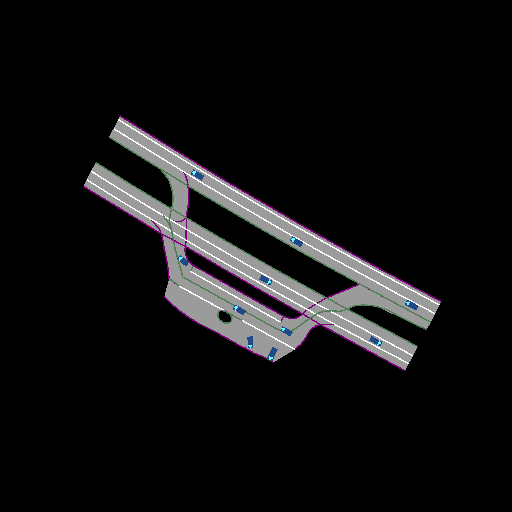

In [10]:
Image(gif_name, width = GIF_SIZE*GIF_RATIO, height = GIF_SIZE)